# Preprocessing

In [ ]:
import pandas as pd
import torch, numpy as np, random
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

train_file_path = 'data/test_data.csv'
test_file_path = '/data/test_data.csv' 

try:
    df_train = pd.read_csv(train_file_path)
    df_test = pd.read_csv(test_file_path)
except FileNotFoundError:
    print("Error: 'dataset/train.csv' and 'dataset/test.csv' Not Found.")
    df_train = None
    df_test = None

print("Train data statistics")
# Shape
print(f"\nShape (Rows, Columns): {df_train.shape}")
# Dtypes
print("\nData Types:")
print(df_train.dtypes)


Train data statistics

Shape (Rows, Columns): (614, 9)

Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [2]:
print(df_train.head(11))

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6       98             58             33      190  34.0   
1             2      112             75             32        0  35.7   
2             2      108             64              0        0  30.8   
3             8      107             80              0        0  24.6   
4             7      136             90              0        0  29.9   
5             6      103             72             32      190  37.7   
6             1       71             48             18       76  20.4   
7             0      117              0              0        0  33.8   
8             4      154             72             29      126  31.3   
9             5      147             78              0        0  33.7   
10           10      111             70             27        0  27.5   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.430   43        0  
1                      0.148   21

In [3]:
print("\nDescriptive Statistics:")
print(df_train.describe())




Descriptive Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   614.000000  614.000000     614.000000     614.000000  614.000000   
mean      3.809446  120.465798      68.903909      20.456026   81.250814   
std       3.375544   31.959619      19.933385      16.063105  116.947384   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  115.000000      72.000000      23.000000   27.000000   
75%       6.000000  140.000000      80.000000      32.000000  130.000000   
max      15.000000  197.000000     114.000000      99.000000  744.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  614.000000                614.000000  614.000000  614.000000  
mean    31.929642                  0.468096   33.265472    0.342020  
std      8.136791                  0.329203   11.851427    0.474773  
min      0

In [4]:
print("Test data statistics")
print(f"\nShape (Rows, Columns): {df_test.shape}")

print(df_test.dtypes)

Test data statistics

Shape (Rows, Columns): (154, 9)
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [5]:
print(df_test.head(10))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1       85             66             29        0  26.6   
1            0      137             40             35      168  43.1   
2            1      189             60             23      846  30.1   
3            5      166             72             19      175  25.8   
4            3      126             88             41      235  39.3   
5            8       99             84              0        0  35.4   
6            1       97             66             15      140  23.2   
7            3       88             58             11       54  24.8   
8           10      122             78             31        0  27.6   
9            4      103             60             33      192  24.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.351   31        0  
1                     2.288   33        1  
2                     0.398   59        1  
3                     0.587   5

In [6]:
print("\nDescriptive Statistics:")
print(df_test.describe())


Descriptive Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   154.000000  154.000000     154.000000     154.000000  154.000000   
mean      3.987013  122.603896      69.909091      20.857143   74.012987   
std       3.352859   32.071493      16.892727      15.549385  108.356829   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.250000      64.000000       0.000000    0.000000   
50%       3.000000  121.500000      71.000000      23.000000   40.000000   
75%       6.000000  140.500000      80.000000      33.000000  123.750000   
max      17.000000  199.000000     122.000000      51.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  154.000000                154.000000  154.000000  154.000000  
mean    32.243506                  0.486948   33.142857    0.376623  
std      6.802277                  0.340347   11.426622    0.486120  
min     18

Zero values for Glucose, BloodPressure, SkinThickness, Insulin, BMI which is impossible. Hence keeping NaN instead of 0

In [7]:
import numpy as np
unwanted_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df_train[unwanted_zero] = df_train[unwanted_zero].replace(0, np.nan)
df_test[unwanted_zero] = df_test[unwanted_zero].replace(0, np.nan)

#check
print(df_train.head(60))

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6     98.0           58.0           33.0    190.0  34.0   
1             2    112.0           75.0           32.0      NaN  35.7   
2             2    108.0           64.0            NaN      NaN  30.8   
3             8    107.0           80.0            NaN      NaN  24.6   
4             7    136.0           90.0            NaN      NaN  29.9   
5             6    103.0           72.0           32.0    190.0  37.7   
6             1     71.0           48.0           18.0     76.0  20.4   
7             0    117.0            NaN            NaN      NaN  33.8   
8             4    154.0           72.0           29.0    126.0  31.3   
9             5    147.0           78.0            NaN      NaN  33.7   
10           10    111.0           70.0           27.0      NaN  27.5   
11            7    179.0           95.0           31.0      NaN  34.2   
12            4    148.0           60.0           2

In [8]:
print(df_test.head(60))

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             1     85.0           66.0           29.0      NaN  26.6   
1             0    137.0           40.0           35.0    168.0  43.1   
2             1    189.0           60.0           23.0    846.0  30.1   
3             5    166.0           72.0           19.0    175.0  25.8   
4             3    126.0           88.0           41.0    235.0  39.3   
5             8     99.0           84.0            NaN      NaN  35.4   
6             1     97.0           66.0           15.0    140.0  23.2   
7             3     88.0           58.0           11.0     54.0  24.8   
8            10    122.0           78.0           31.0      NaN  27.6   
9             4    103.0           60.0           33.0    192.0  24.0   
10            3    180.0           64.0           25.0     70.0  34.0   
11            2     71.0           70.0           27.0      NaN  28.0   
12            5     88.0           66.0           2

In [9]:
print(df_test.isna().sum())
print()
print(df_train.isna().sum())


Pregnancies                  0
Glucose                      1
BloodPressure                4
SkinThickness               43
Insulin                     74
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

Pregnancies                   0
Glucose                       4
BloodPressure                31
SkinThickness               184
Insulin                     300
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Too many NaN values , median imputation 

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df_train[unwanted_zero] = imputer.fit_transform(df_train[unwanted_zero])
df_test[unwanted_zero] = imputer.transform(df_test[unwanted_zero])


In [11]:
print(df_train.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   614.000000  614.000000     614.000000     614.000000  614.000000   
mean      3.809446  121.221498      72.539088      29.146580  142.814332   
std       3.375544   30.434855      12.020412       8.870356   87.347619   
min       0.000000   56.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.250000      64.000000      25.000000  125.000000   
50%       3.000000  116.000000      72.000000      29.000000  126.000000   
75%       6.000000  140.000000      80.000000      32.000000  130.000000   
max      15.000000  197.000000     114.000000      99.000000  744.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  614.000000                614.000000  614.000000  614.000000  
mean    32.510098                  0.468096   33.265472    0.342020  
std      6.897781                  0.329203   11.851427    0.474773  
min     18.200000                  

In [12]:
print(df_test.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   154.000000  154.000000     154.000000     154.000000  154.000000   
mean      3.987013  123.357143      71.779221      28.954545  134.558442   
std       3.352859   30.496690      12.417175       8.494782   81.909721   
min       0.000000   44.000000      40.000000      10.000000   18.000000   
25%       1.000000  100.000000      64.000000      24.000000  120.000000   
50%       3.000000  121.500000      72.000000      29.000000  126.000000   
75%       6.000000  140.500000      80.000000      33.000000  126.000000   
max      17.000000  199.000000     122.000000      51.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  154.000000                154.000000  154.000000  154.000000  
mean    32.243506                  0.486948   33.142857    0.376623  
std      6.802277                  0.340347   11.426622    0.486120  
min     18.200000                  

Feature Scaling - so that there is no bias towards any higher data value

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = df_train.drop('Outcome', axis=1)
y_train = df_train['Outcome']
X_test  = df_test.drop('Outcome', axis=1)
y_test  = df_test['Outcome']

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

np.mean(X_train_scaled, axis=0), np.std(X_train_scaled, axis=0)
np.mean(X_test_scaled, axis=0), np.std(X_test_scaled, axis=0)

(array([ 0.05264677,  0.07022822, -0.06326627, -0.02166665, -0.0945947 ,
        -0.03868035,  0.05731217, -0.01035446]),
 array([0.99085642, 0.9995874 , 1.03048752, 0.95532359, 0.93545668,
        0.98374885, 1.03132842, 0.96180386]))

Split Train for Validation, 80/20

In [14]:
from sklearn.model_selection import train_test_split

X_train_part, X_val, y_train_part, y_val = train_test_split(
    X_train_scaled, 
    y_train, 
    test_size=0.2, 
    stratify=y_train, 
    random_state=42
)

Summary post train/ val split

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# features which had unwanted_zero values
unwanted_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

# again replacing 0 with NaN for imputation
df_train[unwanted_zero] = df_train[unwanted_zero].replace(0, np.nan)
df_test[unwanted_zero] = df_test[unwanted_zero].replace(0, np.nan)

# median imputation
imputer = SimpleImputer(strategy='median')
df_train[unwanted_zero] = imputer.fit_transform(df_train[unwanted_zero])
df_test[unwanted_zero] = imputer.transform(df_test[unwanted_zero])

# Split features/labels
X_train = df_train.drop('Outcome', axis=1)
y_train = df_train['Outcome']
X_test  = df_test.drop('Outcome', axis=1)
y_test  = df_test['Outcome']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Split train into train/val
X_train_part, X_val, y_train_part, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, stratify=y_train, random_state=42
)

# Summaey
print("Shapes:")
print(f"Train: {X_train_part.shape}, Val: {X_val.shape}, Test: {X_test_scaled.shape}\n")

print("Mean and Std after scaling (Train):")
print(pd.DataFrame({
    'mean': X_train_part.mean(axis=0).round(3),
    'std':  X_train_part.std(axis=0).round(3)
}, index=X_train.columns))

print("\nOutcome distribution:")
print("Train:", np.bincount(y_train_part))
print("Val:  ", np.bincount(y_val))
print("Test: ", np.bincount(y_test))


Shapes:
Train: (491, 8), Val: (123, 8), Test: (154, 8)

Mean and Std after scaling (Train):
                           mean    std
Pregnancies              -0.004  1.017
Glucose                  -0.021  0.987
BloodPressure             0.031  0.978
SkinThickness             0.003  0.938
Insulin                   0.004  0.984
BMI                       0.046  1.005
DiabetesPedigreeFunction  0.005  0.984
Age                       0.004  0.994

Outcome distribution:
Train: [323 168]
Val:   [81 42]
Test:  [96 58]


Additional Visualization

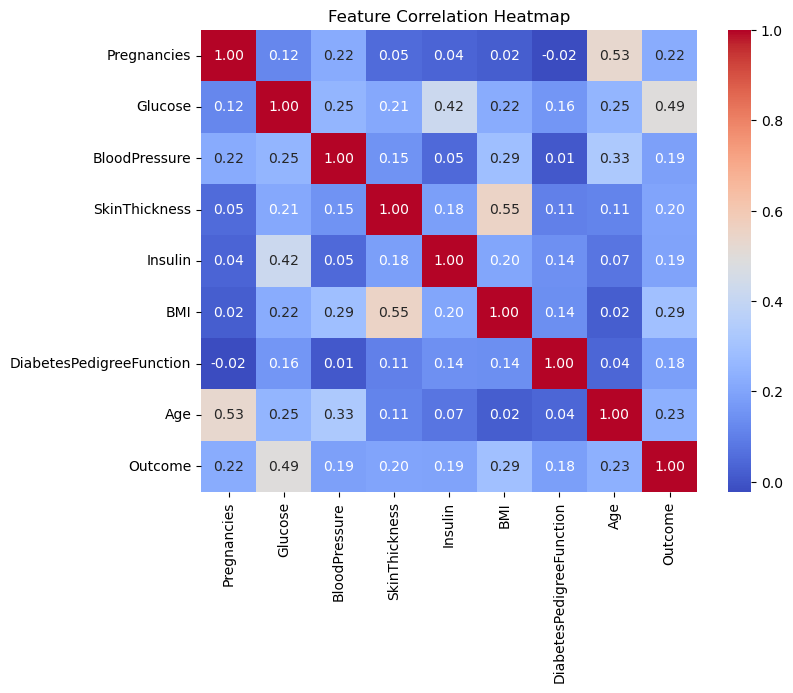

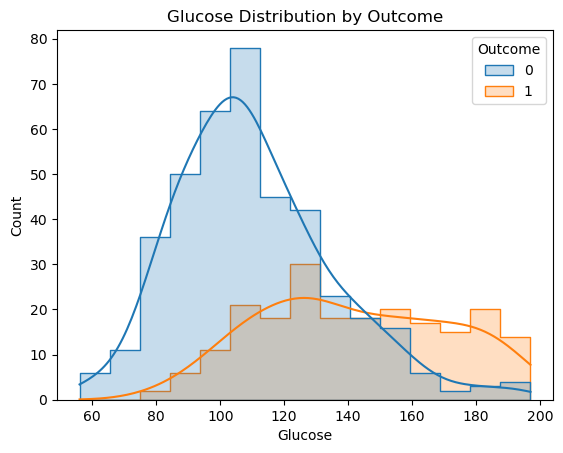

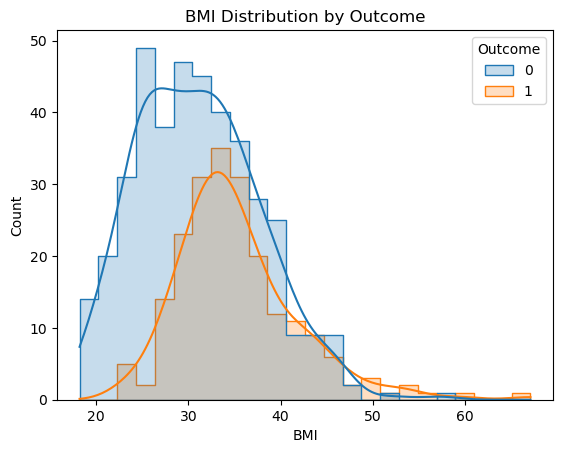

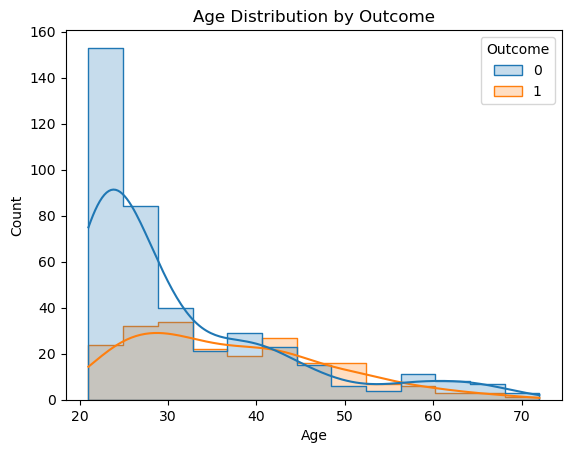

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_train.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

#Outcome vs. Key Features
cols = ['Glucose', 'BMI', 'Age']
for col in cols:
    plt.figure()
    sns.histplot(data=df_train, x=col, hue='Outcome', kde=True, element='step')
    plt.title(f"{col} Distribution by Outcome")
    plt.show()


# Model Implementation

preparing data for training a neural network using pytorch. 

converts the raw data x,y labels into efficient objects that neural network training loop can understand and process in small random batches.
involves 3 steps 
1. custom dataset
2. dataset instances
3. dataloaders

In [17]:
import torch
from torch.utils.data import Dataset, DataLoader

#custom dataset for tabular data 
class TabularDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32) #converts features data x into pytorch tensor of float32 type
        self.y = torch.tensor(y.values, dtype=torch.float32).unsqueeze(1)  # make shape (N,1) , basically flatens the array

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# dataset instances
train_ds = TabularDataset(X_train_part, y_train_part)
val_ds   = TabularDataset(X_val, y_val)
test_ds  = TabularDataset(X_test_scaled, y_test)

#dataLoaders
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=32, shuffle=False)

#check 
# xb, yb = next(iter(train_loader))
# print("Batch X shape:", xb.shape)
# print("Batch y shape:", yb.shape)


MLP Architecture
As data has only 8 features , simple MLP with Binary Cross Entropy with logits (sigmoid and cross-entropy)  so that we avoid rounding fluctuations .
ReLU / Leaky ReLu as activation functions because industry standards.


In [18]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_dim=8, hidden_dim=16, p_dropout=0.0, activation='relu'):
        super().__init__()
        act = nn.ReLU() if activation == 'relu' else nn.LeakyReLU(0.1) #select activation function based on the input
        self.net = nn.Sequential( # creates a sequential container
            nn.Linear(input_dim, hidden_dim),
            act,
            nn.Dropout(p_dropout), # reguularization technique to reduce overfitting
            nn.Linear(hidden_dim, 1)  # 1 logit for binary classification
        )
        
    def forward(self, x):
        return self.net(x)  # logits (no sigmoid here)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #check if GPU is available else use CPU
model = MLP(input_dim=8, hidden_dim=16, p_dropout=0.0, activation='relu').to(device)

xb, yb = next(iter(train_loader)) #confirms that the data nad the model are interacting correctly
xb = xb.to(device)
with torch.no_grad():
    out = model(xb)
print("Logit shape:", out.shape)  # expect [batch, 1]


Logit shape: torch.Size([32, 1])


evaluate function tests the performance of PyTorch neural network
1. setup
2. iterate
3. calculate

In [19]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

#1.
@torch.no_grad() #no gradients
def evaluate(model, loader, device): #model loader
    model.eval()
    all_logits, all_probs, all_targets = [], [], []
    loss_fn = nn.BCEWithLogitsLoss()
    total_loss = 0.0
    n = 0
    for xb, yb in loader: #2.
        xb = xb.to(device); yb = yb.to(device)
        logits = model(xb)
        loss = loss_fn(logits, yb)
        total_loss += loss.item() * xb.size(0)
        n += xb.size(0)
        probs = torch.sigmoid(logits)
        all_logits.append(logits.cpu().numpy())
        all_probs.append(probs.cpu().numpy())
        all_targets.append(yb.cpu().numpy())
    all_probs = np.vstack(all_probs).ravel() #3.
    all_targets = np.vstack(all_targets).ravel()
    preds = (all_probs >= 0.5).astype(int)
    acc = accuracy_score(all_targets, preds)
    f1  = f1_score(all_targets, preds)
    try:
        auc = roc_auc_score(all_targets, all_probs)
    except ValueError:
        auc = float('nan') 
    return {
        "loss": total_loss / n,
        "acc": acc,
        "f1": f1,
        "auc": auc
    }


Train | Adam optimizer | 
backpropogation

1. Setup
2. early stopping 
3. Trining loop

In [22]:
import torch.optim as optim
import copy
from collections import defaultdict

def train_model(model, train_loader, val_loader, device, 
                lr=1e-3, weight_decay=0.0, 
                max_epochs=200, patience=20, verbose=True):
    loss_fn = nn.BCEWithLogitsLoss() #loss function for binary classification
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay) #weight decay L2 regularization / Ridge Regression a penalty on large weights
    # j reg = J + lamda * summation of ( w^2)

    best_val_loss = float('inf') #early stopping based on validation loss
    best_state = copy.deepcopy(model.state_dict())
    patience_left = patience #count down for early stopping

    history = defaultdict(list) # dictionary to store training history

    for epoch in range(1, max_epochs+1): #3.
        model.train()
        running_loss = 0.0
        n = 0
        for xb, yb in train_loader:
            xb = xb.to(device); yb = yb.to(device)
            optimizer.zero_grad()
            logits = model(xb)
            loss = loss_fn(logits, yb)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * xb.size(0)
            n += xb.size(0)
        train_loss = running_loss / n

        val_metrics = evaluate(model, val_loader, device)
        val_loss = val_metrics["loss"]

        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)
        history["val_acc"].append(val_metrics["acc"])
        history["val_f1"].append(val_metrics["f1"])
        history["val_auc"].append(val_metrics["auc"])

        if verbose:
            print(f"Epoch {epoch:03d} | "
                  f"train {train_loss:.4f} | "
                  f"val {val_loss:.4f} | "
                  f"val acc {val_metrics['acc']:.3f} | "
                  f"val F1 {val_metrics['f1']:.3f} | "
                  f"val AUC {val_metrics['auc']:.3f}")
            
        if val_loss < best_val_loss - 1e-6:
            best_val_loss = val_loss
            best_state = copy.deepcopy(model.state_dict())
            patience_left = patience
        else:
            patience_left -= 1
            if patience_left == 0:
                if verbose:
                    print(f"Early stopping at epoch {epoch}. Best val loss: {best_val_loss:.4f}")
                break

    #restore best
    model.load_state_dict(best_state)
    return model, history

#run baseline
baseline = MLP(input_dim=8, hidden_dim=16, p_dropout=0.0, activation='relu').to(device)
baseline, hist = train_model(baseline, train_loader, val_loader, device,
                             lr=1e-3, weight_decay=0.0, max_epochs=200, patience=20)


Epoch 001 | train 0.7391 | val 0.7164 | val acc 0.309 | val F1 0.452 | val AUC 0.461
Epoch 002 | train 0.7089 | val 0.6864 | val acc 0.593 | val F1 0.545 | val AUC 0.631
Epoch 003 | train 0.6822 | val 0.6590 | val acc 0.642 | val F1 0.500 | val AUC 0.724
Epoch 004 | train 0.6588 | val 0.6343 | val acc 0.699 | val F1 0.519 | val AUC 0.766
Epoch 005 | train 0.6372 | val 0.6116 | val acc 0.732 | val F1 0.535 | val AUC 0.790
Epoch 006 | train 0.6174 | val 0.5908 | val acc 0.756 | val F1 0.571 | val AUC 0.812
Epoch 007 | train 0.6001 | val 0.5713 | val acc 0.756 | val F1 0.559 | val AUC 0.822
Epoch 008 | train 0.5847 | val 0.5544 | val acc 0.756 | val F1 0.545 | val AUC 0.832
Epoch 009 | train 0.5713 | val 0.5410 | val acc 0.756 | val F1 0.545 | val AUC 0.841
Epoch 010 | train 0.5594 | val 0.5286 | val acc 0.780 | val F1 0.585 | val AUC 0.846
Epoch 011 | train 0.5491 | val 0.5173 | val acc 0.780 | val F1 0.585 | val AUC 0.849
Epoch 012 | train 0.5405 | val 0.5068 | val acc 0.772 | val F1 0.

In [23]:
val_metrics = evaluate(baseline, val_loader, device)
print("Validation:", val_metrics)


Validation: {'loss': 0.3976899613209856, 'acc': 0.8373983739837398, 'f1': 0.7297297297297297, 'auc': np.float64(0.8912404467960023)}


Plot Learning Curves , Confusion matrix and ROC curve

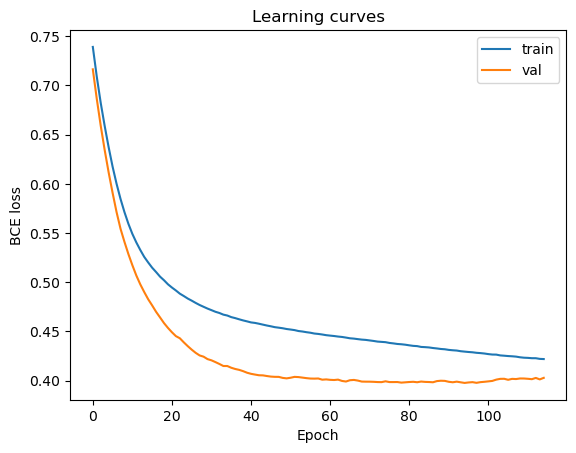

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix
import numpy as np

plt.figure()
plt.plot(hist["train_loss"], label="train")
plt.plot(hist["val_loss"], label="val")
plt.xlabel("Epoch")
plt.ylabel("BCE loss")
plt.title("Learning curves")
plt.legend()
plt.show()


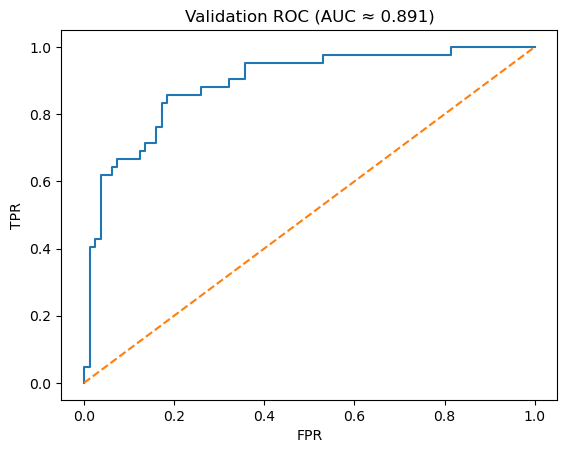

In [25]:
import scipy.integrate
baseline.eval()
all_probs, all_targets = [], []
with torch.no_grad():
    for xb, yb in val_loader:
        xb = xb.to(device)
        probs = torch.sigmoid(baseline(xb)).cpu().numpy().ravel()
        all_probs.append(probs)
        all_targets.append(yb.numpy().ravel())
all_probs = np.concatenate(all_probs)
all_targets = np.concatenate(all_targets)

fpr, tpr, _ = roc_curve(all_targets, all_probs)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title(f"Validation ROC (AUC ≈ {np.trapezoid(tpr, fpr):.3f})")
plt.show()


Confusion Matrix
The model is very good at identifying negative cases (only 5 False Positives)

Model Weakness: It missed 15 positive cases (False Negatives), $15 / (15 + 27) \approx 35\%$ of the true positive cases were incorrectly classified



In [27]:
preds = (all_probs >= 0.5).astype(int)
cm = confusion_matrix(all_targets, preds)
cm

array([[76,  5],
       [15, 27]])

Evaluation for Test set

In [28]:
test_metrics = evaluate(baseline, test_loader, device)
print("Test:", test_metrics)

# Optional: test confusion matrix too
all_probs_test, all_targets_test = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        p = torch.sigmoid(baseline(xb)).cpu().numpy().ravel()
        all_probs_test.append(p)
        all_targets_test.append(yb.numpy().ravel())
all_probs_test = np.concatenate(all_probs_test)
all_targets_test = np.concatenate(all_targets_test)

from sklearn.metrics import confusion_matrix
preds_test = (all_probs_test >= 0.5).astype(int)
print("Test Confusion Matrix:\n", confusion_matrix(all_targets_test, preds_test))


Test: {'loss': 0.45635189909439583, 'acc': 0.7337662337662337, 'f1': 0.6019417475728155, 'auc': np.float64(0.8511135057471264)}
Test Confusion Matrix:
 [[82 14]
 [27 31]]


14 Incorrect negative cases flagged as positive.
27 missed positive cases. 
Area of improvement for this case should be minimizing false negatives. 

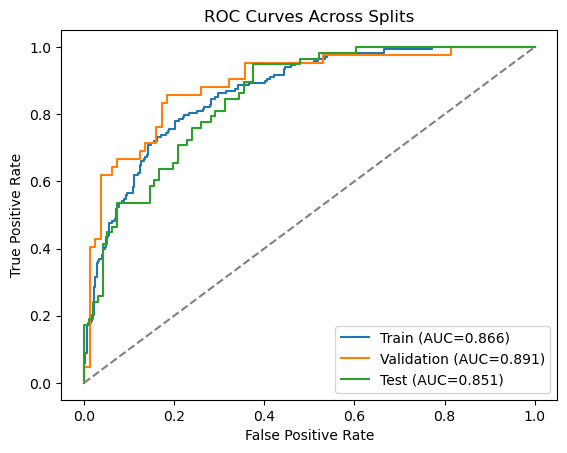

In [29]:
from sklearn.metrics import roc_curve, auc

def get_roc(model, loader):
    all_probs, all_targets = [], []
    model.eval()
    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(device)
            probs = torch.sigmoid(model(xb)).cpu().numpy().ravel()
            all_probs.extend(probs)
            all_targets.extend(yb.numpy().ravel())
    fpr, tpr, _ = roc_curve(all_targets, all_probs)
    return fpr, tpr, auc(fpr, tpr)

plt.figure()
for name, loader in zip(["Train", "Validation", "Test"], [train_loader, val_loader, test_loader]):
    fpr, tpr, auc_score = get_roc(baseline, loader)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_score:.3f})")
plt.plot([0,1],[0,1],'--', color='grey')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curves Across Splits")
plt.legend(); plt.show()


# Experiments

Hyperparameter Tuning 

In [ ]:
def run_config(cfg): 
    model = MLP( #creates a new istance of the MLP model 
        input_dim=8,
        hidden_dim=cfg["hidden_dim"],
        p_dropout=cfg.get("dropout", 0.0),
        activation=cfg.get("activation", "relu")
    ).to(device)
    model, hist_local = train_model( #train the new model
        model, train_loader, val_loader, device,
        lr=cfg.get("lr", 1e-3),
        weight_decay=cfg.get("weight_decay", 0.0),
        max_epochs=200, patience=20, verbose=False
    )
    val_m = evaluate(model, val_loader, device) #evaluate on validation set
    return {**cfg, **{k: float(v) for k,v in val_m.items()}}, model, hist_local

configs = [ # six different hyperparameter configurations
    {"name":"A_relu_16_lr1e-3", "hidden_dim":16, "activation":"relu",      "lr":1e-3},
    {"name":"B_relu_32_lr1e-3", "hidden_dim":32, "activation":"relu",      "lr":1e-3},
    {"name":"C_relu_64_lr1e-3", "hidden_dim":64, "activation":"relu",      "lr":1e-3},
    {"name":"D_lrelu_32_lr1e-3","hidden_dim":32, "activation":"leakyrelu", "lr":1e-3},
    {"name":"E_relu_32_lr3e-4", "hidden_dim":32, "activation":"relu",      "lr":3e-4},
    {"name":"F_relu_32_wd1e-3", "hidden_dim":32, "activation":"relu",      "lr":1e-3, "weight_decay":1e-3},
]

results = []
models = {}
for cfg in configs: 
    res, m, h = run_config(cfg)
    results.append(res)
    models[cfg["name"]] = (m, h)

import pandas as pd
df_results = pd.DataFrame(results)[["name","loss","acc","f1","auc"]].sort_values("f1", ascending=False)
df_results


,name,loss,acc,f1,auc
3,D_lrelu_32_lr1e-3,0.390304,0.845528,0.739726,0.901822
2,C_relu_64_lr1e-3,0.394400,0.821138,0.710526,0.902998
1,B_relu_32_lr1e-3,0.397393,0.821138,0.702703,0.900059
4,E_relu_32_lr3e-4,0.399496,0.821138,0.702703,0.896238
0,A_relu_16_lr1e-3,0.401797,0.796748,0.683544,0.893886
5,F_relu_32_wd1e-3,0.407968,0.796748,0.675325,0.892122


In [32]:
best_name = df_results.iloc[0]["name"]
best_model, best_hist = models[best_name]
print("Best config:", best_name)


Best config: D_lrelu_32_lr1e-3


Configuration D (D_lrelu_32_lr1e-3) achieving F1 0.73 and AUC 0.90. 
Switching the activation function from ReLU to Leaky ReLU had positive impact. 
This suggests slight slope provided by Leaky ReLU for negative inputs helped the model converge to a better solution


Evaluate the best configuration on test set

In [35]:
import pprint
best_model = models["D_lrelu_32_lr1e-3"][0]

#Run on test loader
final_test_metrics = evaluate(best_model, test_loader, device)

print(f"Final Test Metrics for {models['D_lrelu_32_lr1e-3'][0].__class__.__name__}:")
pprint.pprint(final_test_metrics)


Final Test Metrics for MLP:
{'acc': 0.7597402597402597,
 'auc': np.float64(0.8545258620689655),
 'f1': 0.6476190476190476,
 'loss': 0.4533333352633885}


The hyperparameter tuning successfully resulted in a model with a higher F1-Score and a higher AUC on the Test Set. 

This confirms that selecting a larger hidden layer and switching the activation function to Leaky ReLU improved the model's ability to generalize to new data.

In [39]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import torch

best_model.eval()
all_probs, all_targets = [], []


with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        probs = torch.sigmoid(best_model(xb)).cpu().numpy().ravel()
        all_probs.extend(probs)
        all_targets.extend(yb.numpy().ravel())

preds = (np.array(all_probs) >= 0.5).astype(int)
targets = np.array(all_targets)

# Compute and display confusion matrix
cm = confusion_matrix(targets, preds)
print("Confusion Matrix for D_lrelu_32_lr1e-3:\n", cm)



Confusion Matrix for D_lrelu_32_lr1e-3:
 [[83 13]
 [24 34]]


-- x -- x -- 